In [1]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from ajperry_pipeline.ml.models import Transformer


num_epochs = 500
device="cuda"

criterion = nn.BCEWithLogitsLoss(reduction='none')

# Dummy data




transformer = Transformer(
        embedding_model="bert-base-uncased", 
        num_heads= 2,
        num_encoders= 6,
        num_nn_layers = 3,
        embedding_size = 128,
        device = device,
        max_length = 20
    )
optimizer = optim.SGD(transformer.parameters(), lr=0.005)

transformer = transformer.to(device)

losses = []
criterion = nn.BCEWithLogitsLoss(reduction='none')
optimizer = optim.SGD(transformer.parameters(), lr=0.01)

# Dummy data
input_data = ["hello how are you"]
target_data = ["i am well"]

# Training loop (one optimization step shown)
for epoch in range(num_epochs): # Illustrative single epoch
    # 1. Forward pass
    output_logits, outputs, ended = transformer(input_data)
    actuals = torch.tensor([transformer.tokenizer.encode(target_data[i],truncation=True, padding='max_length', max_length=transformer.max_length) for i in range(len(target_data))])
    actuals_onehot = torch.nn.functional.one_hot(actuals, num_classes=transformer.tokenizer.vocab_size)
    logits = torch.stack([torch.stack(logit) for logit in output_logits])
    # Calculate the loss
    loss = criterion(logits, actuals_onehot.float().to(device))
    for i, e in enumerate(ended):
        loss[i,e:] = 0.0
    loss = loss.mean()
    optimizer.zero_grad()
    print(1)
    loss.backward()
    # # 4. Update parameters
    optimizer.step()
    losses.append(loss.item())
    print(loss.item())

1
3.2696914672851562
1
3.247124671936035
1
3.259824752807617
1
3.2660372257232666
1
3.255636215209961
1
3.26021146774292
1
3.285142183303833
1
3.26172137260437
1
3.243107557296753
1
3.2507829666137695
1
3.2547357082366943
1
3.226301908493042
1
3.2271406650543213
1
3.2449252605438232
1
3.235724449157715
1
3.2402546405792236
1
3.2302331924438477
1
3.234116792678833
1
3.2491202354431152
1
3.2393651008605957
1
3.2453012466430664
1
3.2187983989715576
1
3.2527458667755127
1
3.2403042316436768
1
3.2434117794036865
1
3.2506561279296875
1
3.2354190349578857
1
3.2299015522003174
1
3.2468743324279785
1
3.2464418411254883
1
3.2460970878601074
1
3.2456347942352295
1
3.2395763397216797
1
3.2282822132110596
1
3.2515385150909424
1
3.2500827312469482
1
3.210840940475464
1
3.227348804473877
1
3.212972640991211
1
3.240595579147339
1
3.238882541656494
1
3.229426622390747
1
3.225036859512329
1
3.229416608810425
1
3.221169948577881
1
3.2461726665496826
1
3.2514407634735107
1
3.245208501815796
1
3.2166991233

In [12]:
pip install matplotlib pandas

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached pandas-2.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.4 MB/s  0:00:00eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [13]:
from matplotlib import pyplot

In [14]:
import pandas as pd
import numpy as np

# Sample data
data = pd.Series(losses)
running_average = data.rolling(window=10).mean()

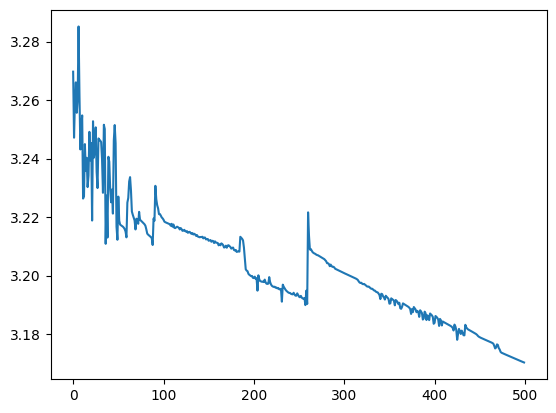

In [15]:
pyplot.plot(losses)